# Importing Libraries

In [238]:
import numpy as np
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('always')

# Loding required dataset

In [240]:
data=pd.read_csv('test_frame.csv')
data.shape

(100000, 12)

In [241]:
data.tail(5)

,Unnamed: 0,vitals_datetime,heart_rate,respiration_over_impedence,spirometry_oxygen_saturation,pulse,blood_pressure_systolic,blood_pressure_diastolic,blood_pressure_average,patient_id,machine_id,Coded
99995,99995,2020-08-06 13:34:04+00:00,88.0,80.0,95.0,78.0,126.0,64.0,89.0,1818313,6BTELE-02,1.0
99996,99996,2020-08-06 13:34:04+00:00,88.0,80.0,95.0,78.0,126.0,64.0,89.0,1818313,6BTELE-02,1.0
99997,99997,2020-08-06 13:34:04+00:00,88.0,80.0,95.0,78.0,126.0,64.0,89.0,1818313,6BTELE-02,1.0
99998,99998,2020-08-06 13:34:04+00:00,88.0,80.0,95.0,78.0,126.0,64.0,89.0,1818313,6BTELE-02,1.0
99999,99999,2020-08-06 13:34:08+00:00,74.0,15.0,100.0,72.0,125.0,78.0,96.0,306358,6WTELE-03,1.0


# Finding if any null values exists

In [242]:
data.isnull().sum()

Unnamed: 0                      0
vitals_datetime                 0
heart_rate                      0
respiration_over_impedence      0
spirometry_oxygen_saturation    0
pulse                           0
blood_pressure_systolic         0
blood_pressure_diastolic        0
blood_pressure_average          0
patient_id                      0
machine_id                      0
Coded                           0
dtype: int64

# As sk learn won't accept  categorical variables ..we should remove them

In [243]:
data.dtypes

Unnamed: 0                        int64
vitals_datetime                  object
heart_rate                      float64
respiration_over_impedence      float64
spirometry_oxygen_saturation    float64
pulse                           float64
blood_pressure_systolic         float64
blood_pressure_diastolic        float64
blood_pressure_average          float64
patient_id                        int64
machine_id                       object
Coded                           float64
dtype: object

Text(0.5, 0, 'Coded')

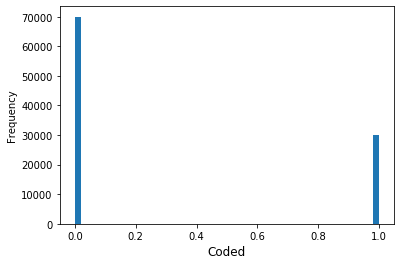

In [244]:
data['Coded'].plot.hist(bins = 50)
plt.xlabel('Coded', fontsize=12)

In [245]:
data.head(5)

,Unnamed: 0,vitals_datetime,heart_rate,respiration_over_impedence,spirometry_oxygen_saturation,pulse,blood_pressure_systolic,blood_pressure_diastolic,blood_pressure_average,patient_id,machine_id,Coded
0,0,2020-08-01 00:00:01+00:00,87.0,11.0,99.0,113.0,127.0,55.0,75.0,1824098,6BTELE-31,0.0
1,1,2020-08-01 00:00:06+00:00,49.0,0.0,100.0,71.0,139.0,65.0,112.0,151310,6WNTX-16,0.0
2,2,2020-08-01 00:00:14+00:00,105.0,20.0,95.0,106.0,86.0,35.0,49.0,1823860,MICU-02,0.0
3,3,2020-08-01 00:00:23+00:00,82.0,23.0,100.0,82.0,187.0,112.0,141.0,1824302,MICU-06,0.0
4,4,2020-08-01 00:00:32+00:00,84.0,18.0,99.0,84.0,124.0,75.0,91.0,131903,MICU-05,0.0


# Finding unique patients with patient_id and removing duplicates if present

In [246]:
data['patient_id'].nunique()
data['patient_id'].value_counts()

1818313    8423
1818122    8344
1014828    4183
9022577    3859
1824476    3434
1824390    3252
1824542    3223
1824098    2980
340063     2807
1823860    2457
1824302    2349
1080323    2349
1293746    2331
27624      2072
1752767    1972
1824545    1965
415546     1765
1310235    1555
267139     1531
1434939    1508
184925     1490
306358     1488
158087     1435
1824488    1312
1465353    1290
494197     1285
1823896    1283
1817996    1273
402696     1216
1557438    1198
           ... 
151257       54
417613       50
1023954      48
1685833      48
1796088      44
1824494      41
1013295      38
1747437      36
1814283      31
1363623      27
1824667      23
1464232      23
270901       20
1798091      19
1753153      19
1585498      18
1349574      17
525784       17
1824600      16
1445594      16
1822792      15
163199       15
1304387      12
334870       11
1297155      10
1061161       8
1825054       7
1810628       5
1784528       4
9038962       2
Name: patient_id, Length

In [247]:
data.nunique()

Unnamed: 0                      100000
vitals_datetime                  69620
heart_rate                         168
respiration_over_impedence         122
spirometry_oxygen_saturation        38
pulse                              147
blood_pressure_systolic            131
blood_pressure_diastolic            97
blood_pressure_average             112
patient_id                         126
machine_id                          73
Coded                                2
dtype: int64

# Dropping duplicate values

In [248]:
data.drop_duplicates(subset='patient_id', keep='first', inplace=True)

# Dropping categorical variables

In [249]:
data.drop(['Unnamed: 0','vitals_datetime','machine_id','patient_id'],axis=1,inplace=True)

In [250]:
data.describe()

,heart_rate,respiration_over_impedence,spirometry_oxygen_saturation,pulse,blood_pressure_systolic,blood_pressure_diastolic,blood_pressure_average,Coded
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,82.880952,19.738095,97.468254,81.563492,130.285714,72.698413,92.190476,0.015873
std,21.326268,8.984590,3.738848,20.672492,26.844100,16.256578,20.746745,0.125483
min,31.000000,0.000000,76.000000,33.000000,78.000000,35.000000,49.000000,0.000000
25%,68.250000,16.000000,96.000000,68.000000,110.750000,60.000000,78.000000,0.000000
50%,81.000000,19.000000,99.000000,76.000000,125.500000,72.500000,90.000000,0.000000
75%,94.000000,23.000000,100.000000,96.000000,151.750000,84.750000,104.000000,0.000000
max,156.000000,80.000000,100.000000,152.000000,204.000000,112.000000,172.000000,1.000000


In [251]:
data.tail(10)

,heart_rate,respiration_over_impedence,spirometry_oxygen_saturation,pulse,blood_pressure_systolic,blood_pressure_diastolic,blood_pressure_average,Coded
62894,118.0,22.0,96.0,112.0,104.0,57.0,70.0,0.0
64100,59.0,16.0,99.0,58.0,161.0,85.0,131.0,0.0
64752,86.0,41.0,90.0,74.0,182.0,88.0,106.0,0.0
65564,80.0,1.0,100.0,92.0,122.0,69.0,81.0,0.0
67510,56.0,19.0,96.0,56.0,107.0,48.0,66.0,0.0
68266,75.0,22.0,99.0,65.0,134.0,80.0,91.0,0.0
69341,82.0,26.0,97.0,66.0,91.0,49.0,77.0,0.0
69842,102.0,23.0,96.0,94.0,130.0,64.0,92.0,0.0
70001,66.0,13.0,92.0,61.0,128.0,61.0,71.0,1.0
96135,101.0,23.0,91.0,102.0,136.0,70.0,82.0,1.0


In [252]:
x=data.drop(['Coded'],axis=1)
y=data['Coded']
x.shape, y.shape

((126, 7), (126,))

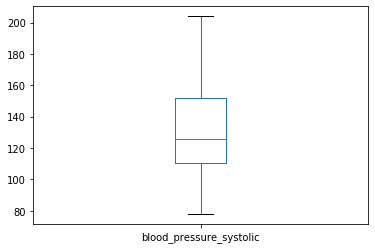

In [253]:
data['blood_pressure_systolic'].plot.box()

In [254]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [255]:
x=pd.DataFrame(x_scaled,columns=x.columns)
x.head(5)

,heart_rate,respiration_over_impedence,spirometry_oxygen_saturation,pulse,blood_pressure_systolic,blood_pressure_diastolic,blood_pressure_average
0,0.448,0.1375,0.958333,0.672269,0.388889,0.259740,0.211382
1,0.144,0.0000,1.000000,0.319328,0.484127,0.389610,0.512195
2,0.592,0.2500,0.791667,0.613445,0.063492,0.000000,0.000000
3,0.408,0.2875,1.000000,0.411765,0.865079,1.000000,0.747967
4,0.424,0.2250,0.958333,0.428571,0.365079,0.519481,0.341463


In [256]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=50,stratify=y)

In [257]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [258]:
clf=KNN(n_neighbors=5)
clf.fit(train_x,train_y)
test_predict=clf.predict(test_x)
k=f1_score(test_predict, test_y,average='macro')
print("F1 score of test is:", k)

F1 score of test is: 0.49206349206349204


C:\Users\yadda\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# ACCURACY SCORE OF KNN MODEL IS GOOD 

In [259]:
clf.score(train_x,train_y)

0.9893617021276596

In [260]:
def  Elbow(K):
    test_error=[]
    
    for i in K:
        clf=KNN(n_neighbors=i)
        clf.fit(train_x,train_y)
        tmp=clf.predict(test_x)
        tmp=f1_score(tmp,test_y)
        error=1-tmp
        test_error.append(error)
    return test_error

In [261]:
k=(1,20,2)

In [262]:
Optimal_value=Elbow(k)

C:\Users\yadda\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\yadda\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


Text(0.5, 1.0, 'Elbow curve for optimal K value')

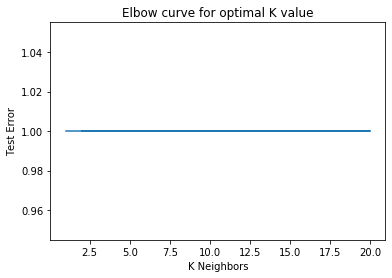

In [263]:
plt.plot(k,Optimal_value)
plt.xlabel("K Neighbors")
plt.ylabel("Test Error")
plt.title("Elbow curve for optimal K value")

# Confusion matrix and classification report...

In [264]:
#confusionMatrix
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(test_y,test_predict)
cf

array([[31,  0],
       [ 1,  0]], dtype=int64)

In [265]:
from sklearn.metrics import classification_report as rp
print(rp(test_y,test_predict))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        31
         1.0       0.00      0.00      0.00         1

    accuracy                           0.97        32
   macro avg       0.48      0.50      0.49        32
weighted avg       0.94      0.97      0.95        32



C:\Users\yadda\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yadda\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yadda\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
